In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import StratifiedShuffleSplit,StratifiedKFold,train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords,wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import os
from collections import Counter
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

## Download Personal Loan Data
#### [Personal Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data/data)

#### Code is running under python 3.x version

In [2]:
#load dataset
thepath ='/Users/gyang/Desktop/ProjectDataScience/final/'

loandata =pd.read_csv(thepath +'loan.csv')

/Users/gyang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
#fully load original dataset
pd.set_option('display.max_columns',None)
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [5]:
loandata.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [6]:
loandata2 =loandata.drop(['id','member_id','emp_title','url','zip_code','desc','issue_d',
                         'earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'], axis=1, inplace=False)

In [7]:
loandata2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#reorder grade variable
loandata2['grade'] = loandata2['grade'].astype('category')
loandata2['grade'].cat.reorder_categories(['A','B','C','D','E','F','G'], inplace=True)

#reorder emp_length
loandata2['emp_length'] = loandata2['emp_length'].astype('category')
loandata2['emp_length'].cat.reorder_categories(["< 1 year", "1 year","2 years","3 years","4 years",
                                                "5 years","6 years","7 years","8 years","9 years",
                                                "10+ years","n/a"], inplace=True)

In [9]:
#target label
loandata2['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

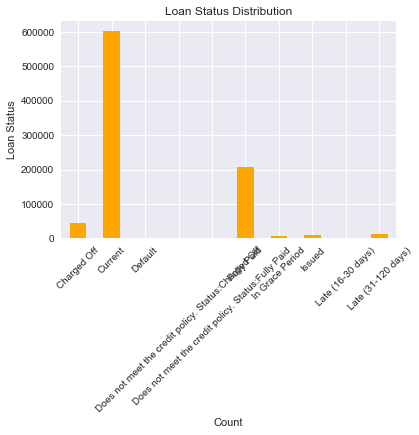

In [10]:
ax1 =loandata2.groupby('loan_status').size().plot(kind='bar',color ='orange',rot=45,title="Loan Status Distribution")
ax1.set_xlabel("Count")
ax1.set_ylabel("Loan Status")
ax1.grid(True)

In [11]:
def loanStat(x):
    if x in ['Current','Fully Paid','In Grace Period']:
        return 0
    else:
        return 1    

In [12]:
loandata2['default'] =loandata2['loan_status'].apply(lambda x :loanStat(x))
loandata2['default'] = loandata2['default'].astype('category')

In [13]:
loandata2['default'].value_counts()

0    815755
1     71624
Name: default, dtype: int64

In [14]:
#check missing value
#categorical features
miss_category = loandata2.select_dtypes(include=['object','category'])
miss_cate_rate = miss_category.isnull().sum(axis =0)/float(len(miss_category))
miss_cate_rate.sort_values(ascending=False)

verification_status_joint    0.999424
title                        0.000170
default                      0.000000
application_type             0.000000
initial_list_status          0.000000
addr_state                   0.000000
purpose                      0.000000
pymnt_plan                   0.000000
loan_status                  0.000000
verification_status          0.000000
home_ownership               0.000000
emp_length                   0.000000
sub_grade                    0.000000
grade                        0.000000
term                         0.000000
dtype: float64

In [15]:
loandata3 =loandata2.drop(miss_cate_rate[miss_cate_rate >0.5].index, axis=1, inplace=False) 

In [16]:
# check numerical features
miss_numerical = loandata3.select_dtypes(exclude=['object','category'])
miss_num_rate = miss_numerical.isnull().sum(axis =0)/float(len(miss_numerical))
miss_num_rate.sort_values(ascending=False)

dti_joint                      0.999426
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
total_cu_tl                    0.975916
open_acc_6m                    0.975916
open_il_6m                     0.975916
open_il_12m                    0.975916
open_il_24m                    0.975916
inq_last_12m                   0.975916
total_bal_il                   0.975916
inq_fi                         0.975916
open_rv_24m                    0.975916
max_bal_bc                     0.975916
all_util                       0.975916
open_rv_12m                    0.975916
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
mths_since_last_delinq         0.511971
tot_cur_bal                    0.079195
tot_coll_amt                   0.079195
total_rev_hi_lim               0.079195
revol_util                     0.000566
collections_12_mths_ex_med     0.000163
total_acc                      0.000033


In [17]:
loandata4 =loandata3.drop(miss_num_rate[miss_num_rate >0.5].index, axis=1, inplace=False) 

In [18]:
#lower case
loandata4['title'] =loandata4['title'].str.lower()

In [19]:
def loantitle(x):
    if x in ['business']: #business
        return 1
    elif x in ['other']: #other
        return 3
    else:
        return 2 #personal

In [20]:
loandata4['loan_title'] =loandata4['title'].apply(lambda x :loantitle(x))
loandata4['loan_title'] = loandata4['loan_title'].astype('object')

In [21]:
#drop title feature
loandata5 =loandata4.drop(['title','loan_status'],1)

In [22]:
loandata5.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default,loan_title
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,2
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2


## Data Visualization

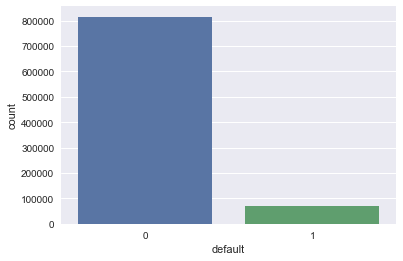

In [22]:
sns.countplot(x="default", data=loandata5)

In [22]:
loandata2['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

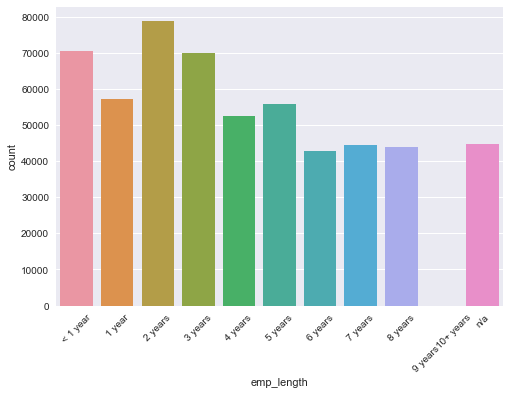

In [27]:
sns.countplot(x="emp_length", data=loandata5,order=["< 1 year", "1 year","2 years","3 years","4 years",
                                                   "5 years","6 years","7 years","8 years","9 years"
                                                   "10+ years","n/a"])
plt.xticks(rotation=45)

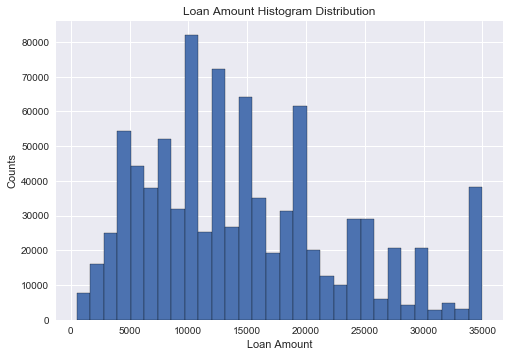

In [188]:
sns.set()
_ =plt.hist(loandata5['loan_amnt'],edgecolor='black',bins =30)
_ =plt.xlabel('Loan Amount')
_ =plt.ylabel('Counts')
_ =plt.title('Loan Amount Histogram Distribution')
plt.show()

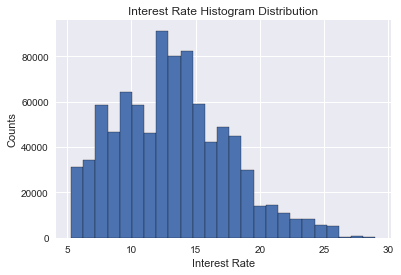

In [174]:
sns.set()
_ =plt.hist(loandata5['int_rate'],edgecolor='black',bins =25)
_ =plt.xlabel('Interest Rate')
_ =plt.ylabel('Counts')
_ =plt.title('Interest Rate Histogram Distribution')
plt.show()

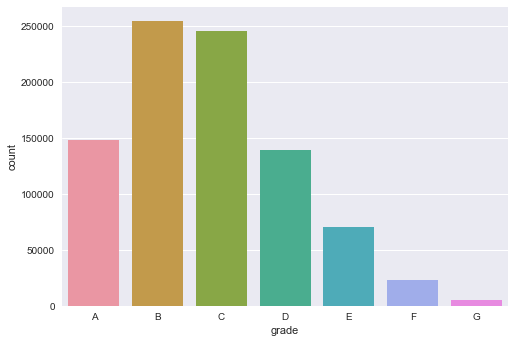

In [189]:
sns.countplot(x="grade", data=loandata5)

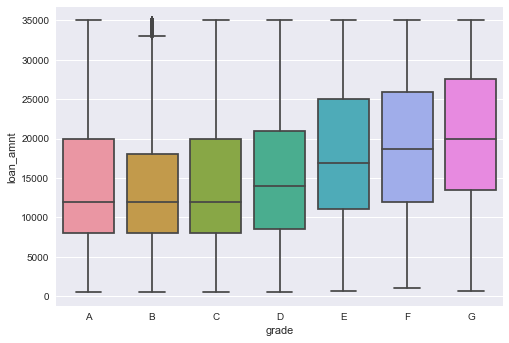

In [190]:
sns.boxplot(x="grade", y="loan_amnt", data=loandata5)

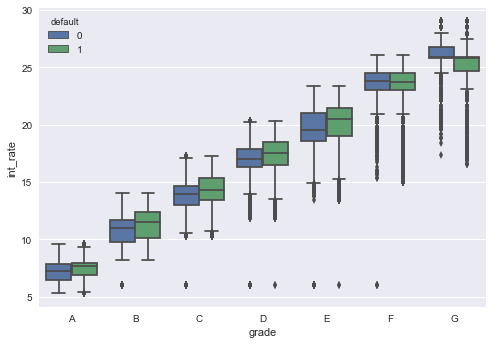

In [191]:
#grade vs interest rate
sns.boxplot(x="grade", y="int_rate",hue="default", data=loandata5)

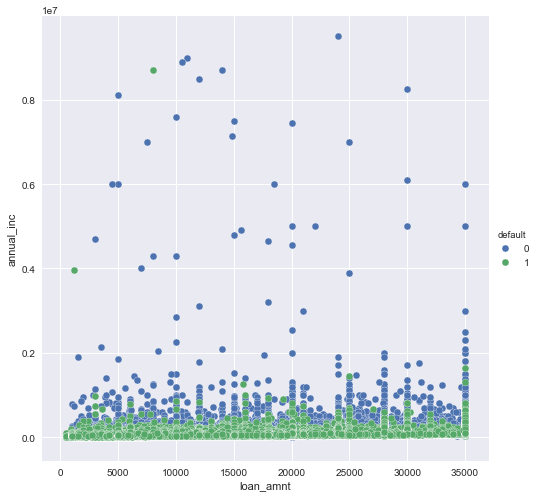

In [192]:
#scatterplot loan amount VS annual income
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=loandata5, hue="default", size=7)

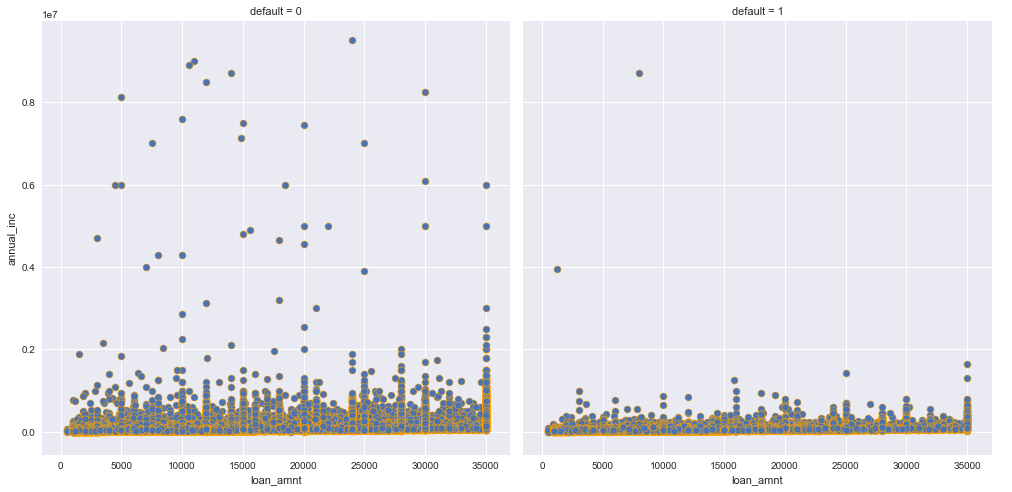

In [170]:
#scatterplot loan amount VS annual income
#grid labels
kws = dict(s=50, linewidth=0.5,edgecolor="orange")
g = sns.FacetGrid(loandata5, col="default", palette="Set1",size =7)
g = (g.map(plt.scatter, "loan_amnt", "annual_inc", **kws).add_legend())

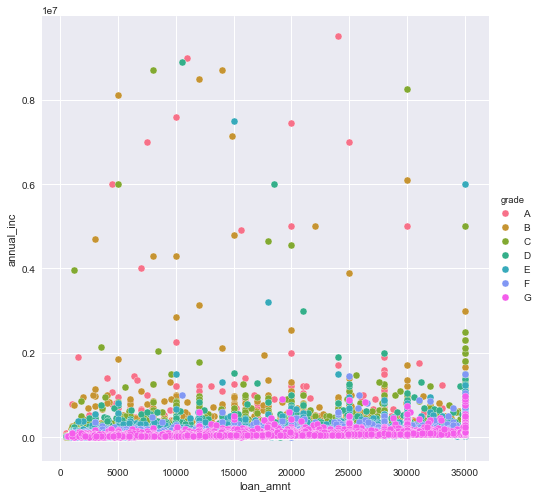

In [193]:
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=loandata5, hue="grade", size=7)

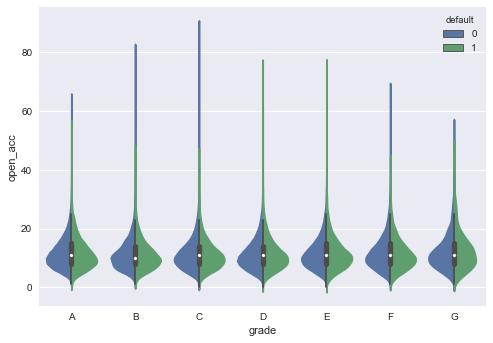

In [194]:
#grade VS Numbers of Open accounts
sns.violinplot(x="grade", y="open_acc", hue="default", data=loandata5, split=True,size =10)

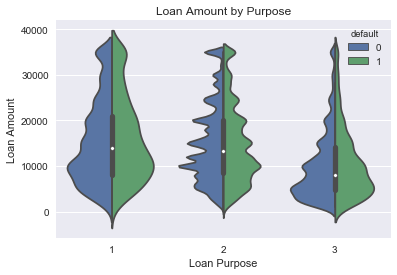

In [169]:
#Loan Purpose VS Loan Amount
sns.violinplot(x="loan_title", y="loan_amnt", hue="default", data=loandata5, split=True,size =15)
plt.title("Loan Amount by Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Loan Amount")

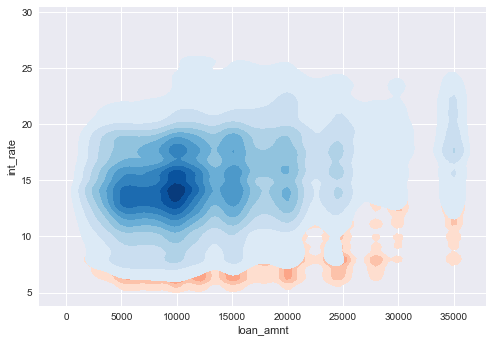

In [203]:
#density plot
#heatmap
#loan amount vs interest rate
#blue color - default =1
#red color - default =0

d0 = loandata5.loc[loandata5.default == 0]
d1 = loandata5.loc[loandata5.default == 1]
ax = sns.kdeplot(d0.loan_amnt, d0.int_rate,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(d1.loan_amnt, d1.int_rate,
                 cmap="Blues", shade=True, shade_lowest=False)

In [110]:
#wordcloud Description Variable
text = loandata['desc'].dropna().str.lower()
token = [re.sub(r'[^a-zA-Z]+', ' ',token) for token in text]

In [112]:
def filter_list(list_name):
    #remove stopwords
    stops = set(stopwords.words("english"))
    
    #convert to single word within list
    word_list= []
    for words in list_name:
        for word in words[:-4].split():
            word_list.append(word)
            
    filtered_words = [word for word in word_list if word not in stops]
    
    wnl = WordNetLemmatizer()
    
    filtered_words_1 =[]
    for r in filtered_words:
        filtered_words_1.append(wnl.lemmatize(r)) #change plurals nouns.
        
    filtered_words_2 =[]
    for r in filtered_words_1:
        filtered_words_2.append(wnl.lemmatize(r,'v')) #change to original tense(verb.)
    
    return filtered_words_2   

In [158]:
new_token =filter_list(token)
new_str =','.join(new_token) #convert into string

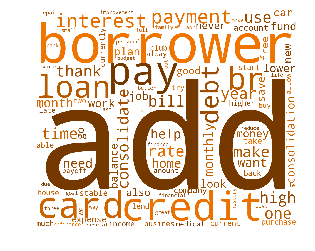

In [164]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(background_color='white',width=1200,
                      height=1000,max_words=100,color_func=random_color_func).generate(new_str)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [58]:
df = pd.DataFrame({'Total_LoanAmount' : loandata.groupby(['addr_state'])['loan_amnt'].sum(),
                  'Avg_Income':loandata.groupby(['addr_state'])['annual_inc'].mean(),
                  'Avg_InterestRate':loandata.groupby(['addr_state'])['int_rate'].mean(),
                  'Total_Payment':loandata.groupby(['addr_state'])['total_pymnt'].sum(),
                  'Avg_OpenAcc':loandata.groupby(['addr_state'])['total_acc'].mean()}).reset_index()

In [59]:
df.head()

,addr_state,Avg_Income,Avg_InterestRate,Avg_OpenAcc,Total_LoanAmount,Total_Payment
0,AK,77009.756503,13.639791,23.809524,3.697805e+07,2.115020e+07
1,AL,68532.348454,13.757150,26.688571,1.646276e+08,8.223780e+07
2,AR,65818.677627,13.458215,25.967771,9.341608e+07,4.618769e+07
3,AZ,71642.650718,13.131357,25.042769,2.901101e+08,1.489150e+08
4,CA,79294.338641,13.161718,23.409081,1.898145e+09,1.044048e+09


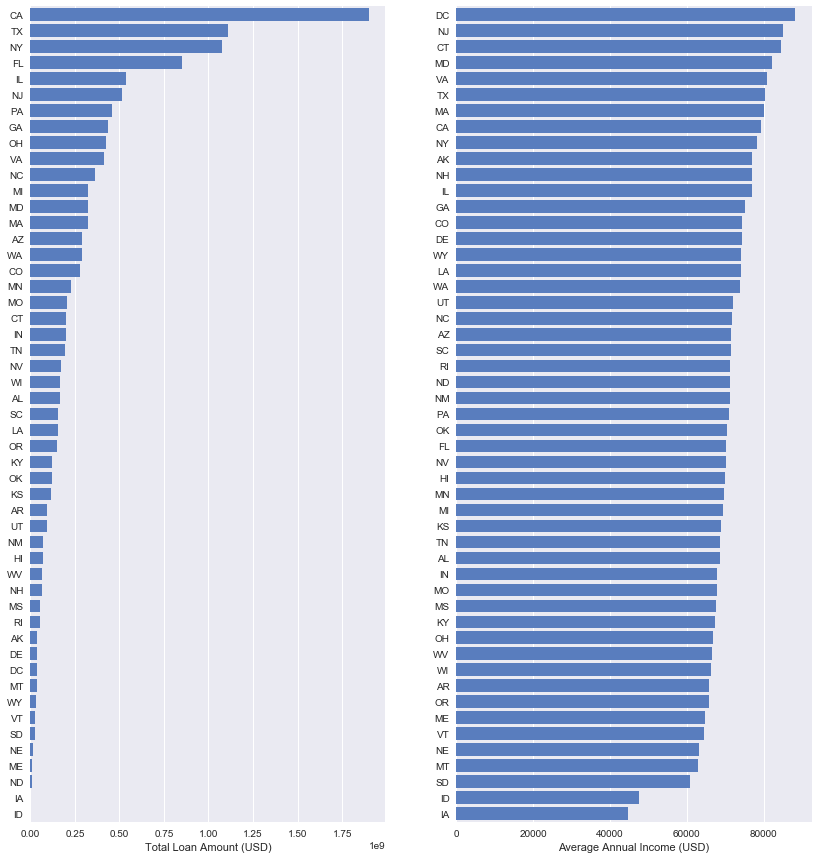

In [45]:
sns.set()

# Top States on Total Loan Amount VS Average Income
df.sort_values(['Total_LoanAmount'], ascending=False, inplace=True)

f, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 15))

#add col 1 -- total loan
sns.set_color_codes("muted")
sns.barplot(x='Total_LoanAmount', y='addr_state', data=df,color="b",ax=ax[0])
#ax.set_xlabel('Total Loan Amount')
#ax.set_ylabel('States (Abv.)')
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax[0].set(ylabel="",xlabel="Total Loan Amount (USD)")
sns.despine(left=True, bottom=True)

#add col 2 -- average income 
df.sort_values(['Avg_Income'], ascending=False, inplace=True)
sns.set_color_codes("muted")
sns.barplot(x='Avg_Income', y='addr_state', data=df,color="b",ax=ax[1])
ax[1].set(ylabel="",xlabel="Average Annual Income (USD)")
sns.despine(left=True, bottom=True)

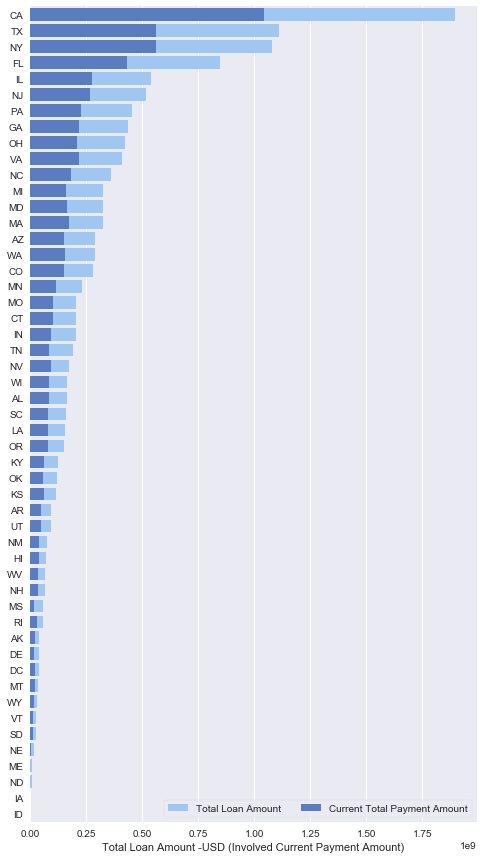

In [44]:
# Total Loan Amount -USD (Involved Current Payment Amount)

sns.set()
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 15))

df.sort_values(['Total_LoanAmount'], ascending=False, inplace=True)

# Plot the total loan amount
sns.set_color_codes("pastel")
sns.barplot(x="Total_LoanAmount", y="addr_state", data=df,
            label="Total Loan Amount", color="b")

# Plot current total payment amount involved
sns.set_color_codes("muted")
sns.barplot(x="Total_Payment", y="addr_state", data=df,
            label="Current Total Payment Amount", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Total Loan Amount -USD (Involved Current Payment Amount)")
sns.despine(left=True, bottom=True)

In [53]:
import plotly
# register Poltly free account first,then check out your API keys
plotly.tools.set_credentials_file(username='yg2499', api_key='el7rt983crGV1cp4vHvr')

In [62]:
for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
        [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['addr_state'] + '<br>'+\
            'Average Annual Income (USD): '+df['Avg_Income'] +'<br>'+\
            'Average Interest Rate (Percentage): '+df['Avg_InterestRate']+'<br>'+\
            'Total Payment Amount (USD): '+df['Total_Payment'] +'<br>'+\
            'Average Number of Open Account: '+df['Avg_OpenAcc']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['addr_state'],
        z = df['Total_LoanAmount'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Billions USD")
        ) ]

layout = dict(
        title = '2007 -2015 United States Personal Credit Overview by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~yg2499/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


## Split Dataset

### Part 1: Label -- Default Variable (Loan Status -0/1 Binary Type)

In [100]:
# training data - 70% ,testing data -30%
sess = StratifiedShuffleSplit(loandata5['default'].values,test_size = 0.3)
for train_index,test_index in sess:
    trainData = loandata5.iloc[train_index]
    testData = loandata5.iloc[test_index]
    
X_train_1,y_train = trainData.drop(['default'],1) ,trainData['default']
X_test_1,y_test = testData.drop(['default'],1) ,testData['default']

In [103]:
def cleandata(dt):
    #categorical features
    #one-hot-encode
    CONVERT_COLUMNS =list(dt.select_dtypes(include=['object','category']).columns)
    data_2 = pd.get_dummies(dt, columns =CONVERT_COLUMNS)
    
    #convert all NaN to Zero
    data_3 = data_2.replace(np.nan, 0)
    
    #numerical feature scaling
    scaler = MinMaxScaler()
    header_list = list(data_3.iloc[:,:30].columns)
    data_3[header_list] = scaler.fit_transform(data_3[header_list])
    
    return data_3

In [104]:
X_train =cleandata(X_train_1)
X_test =cleandata(X_test_1)

In [105]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_n/a,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,loan_title_1,loan_title_2,loan_title_3
737077,0.333333,0.333333,0.342857,0.239544,0.263763,0.007895,0.000531,0.000000,0.035714,0.044444,0.000000,0.002410,0.518135,0.166667,0.201819,0.201819,0.047337,0.047337,0.058161,0.028894,0.0,0.0,0.0,0.010807,0.0,0.0,0.0,0.000000,0.031251,0.00070,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
496545,0.391304,0.391304,0.400000,0.281791,0.206795,0.006842,0.001346,0.102564,0.035714,0.122222,0.000000,0.002327,0.280311,0.217949,0.280083,0.280083,0.005227,0.005227,0.004899,0.005393,0.0,0.0,0.0,0.008566,0.0,0.0,0.0,0.000000,0.022374,0.00125,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
798039,0.681159,0.681159,0.685714,0.108576,0.328507,0.011579,0.002373,0.000000,0.000000,0.188889,0.000000,0.007237,0.145596,0.192308,0.424789,0.424789,0.075425,0.075425,0.086484,0.054985,0.0,0.0,0.0,0.013354,0.0,0.0,0.0,0.000000,0.042390,0.00747,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

## Dataset is ready to train ...

## Split Dataset

### Part 2: Label -- Interest Rate% Variable